**Importing all necessary libraries**

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

**Understanding the structure of the data**


In [3]:
#Loading the dataset
Foodhub = pd.read_csv('foodhub_order.csv')  


In [4]:
#Checking the first 5 rows of the dataset
Foodhub.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24


In [4]:
#Checking the last 5 rows of the dataset
Foodhub.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.310,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.180,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.220,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.180,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.450,Weekend,Not given,28,24


**Observations:**
The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

In [5]:
Foodhub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [5]:
#Shape of the dataset
Foodhub.shape

(1898, 9)

**Observations:**

There are 1898 rows and 9 columns in the dataset.

In [16]:
#Replacing values with Not given
Foodhub['rating'] = Foodhub['rating'].replace('Not given', 0).astype(int)

In [13]:
# Check the data type and general info of the dataset
Foodhub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   int32  
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int32(1), int64(4), object(3)
memory usage: 126.2+ KB


**Observations:**
* There are 5 numerical columns and 4 object type columns.
*The rating column is been read as object type column, but it should be a numerical format type.

In [99]:
# Checking the data type again to see the changes made.
Foodhub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1162 non-null   int64  
 8   delivery_time          1162 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 90.8+ KB


* Observe that the rating column has been changed from type of object to float in the above output.

In [100]:
Foodhub.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5.000,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3.000,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4.000,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.220,Weekday,3.000,20,24
7,1477859,89574,Barbounia,Mediterranean,5.970,Weekday,3.000,33,30


In [15]:
# Checking for missing values
Foodhub.isnull().sum()

0

In [62]:
#Treating the missing values in ratings
Foodhub.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

**Observations:**

Now the missing values in ratings is treated.

In [63]:
# Checking for duplicates in the dataset
Foodhub.duplicated().sum()

0

* There are no duplicates in the dataset.

In [18]:
# summary statistics of the dataset in transposed position
Foodhub.iloc[:,2:].describe().T


0       0
1       0
2       5
3       3
4       4
       ..
1893    5
1894    5
1895    0
1896    5
1897    0
Name: rating, Length: 1898, dtype: int32

**Observations:**


* `Order_id:` On average there are approximately 1.5 million unique IDs of orders.
* `Customer_id:` Notice that the average customer_id is less than the average order_id, which indicates that not all customers provide their ids in comparison with the order ids issued.
* `cost_of_the_order:` The minimum cost of order is approximately 4.5 while the maximum cost is about 35.
* `rating:` Only 1162 people out of 1898 gave ratings of the restaurants, with the average rating of 4.344 out of possible 5, which is a pass in my books.
* `food_preparation_time:` it takes a minimum of 20 minutes, an average of 27 minutes, and maximum of 35 minutes to prepare the foods.
* `delivery_time:` it takes an average of 24 minutes and a maximum of 33 minutes to deliver the ordered foods to the customers.

In [11]:
#Q5
Foodhub['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

In [14]:
#Q8
Foodhub_Weekend = Foodhub[Foodhub['day_of_the_week']=='Weekend']
Foodhub_Weekend['cuisine_type'].value_counts()

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

In [12]:
#Q9
foodhub_Costoforder = Foodhub[Foodhub['cost_of_the_order']> 20]
foodhub_Costoforder.shape[0]/1898*100


29.24130663856691

In [65]:
# Checking the count and percentage of categorical levels in each column.
cat_cols = ['restaurant_name', 'cuisine_type', 'day_of_the_week']

for column in cat_cols:
    print(Foodhub[column].value_counts())
    print("-" * 50)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64
--------------------------------------------------
cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64
--------------------------------------------------
day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64
--------------------------------------------------


In [66]:
# Printing the percentage of unique categorical levels in each column.
for column in cat_cols:
    print(Foodhub[column].value_counts(normalize= True))
    print("-" * 50)

restaurant_name
Shake Shack                 0.115
The Meatball Shop           0.070
Blue Ribbon Sushi           0.063
Blue Ribbon Fried Chicken   0.051
Parm                        0.036
                             ... 
Sushi Choshi                0.001
Dos Caminos Soho            0.001
La Follia                   0.001
Philippe Chow               0.001
'wichcraft                  0.001
Name: proportion, Length: 178, dtype: float64
--------------------------------------------------
cuisine_type
American         0.308
Japanese         0.248
Italian          0.157
Chinese          0.113
Mexican          0.041
Indian           0.038
Middle Eastern   0.026
Mediterranean    0.024
Thai             0.010
French           0.009
Southern         0.009
Korean           0.007
Spanish          0.006
Vietnamese       0.004
Name: proportion, dtype: float64
--------------------------------------------------
day_of_the_week
Weekend   0.712
Weekday   0.288
Name: proportion, dtype: float64
-------------

**Observations:**
* The restaurant with the most number of oreders is the shake shack with 219 orders which represents aproximately 12 percent, followed by the meat ball shop with 132 orders which represents 7 percent.

* American cuisine seems to be the most requested cuisine type with 584 orders which represents 30 percent followed by the Japanese cuisine type of 470 orders which represents aproximately 25 percent, while vietnamese cuisine is the less requested with 7 orders which represents  percent.

* People tend to order food more on weekends with 1351 orders against weekdays orders of 547. which makes alot of sense as they are more relaxed to sit down and eat on weekends, while they just grab fast foods or junks in weekdays because of tight schedules.

**Univariate Analysis**

**<center>Now let's check the distribution for the numerical columns in our dataset.<center>**
**<center>Observations on Order_ID column<center>**

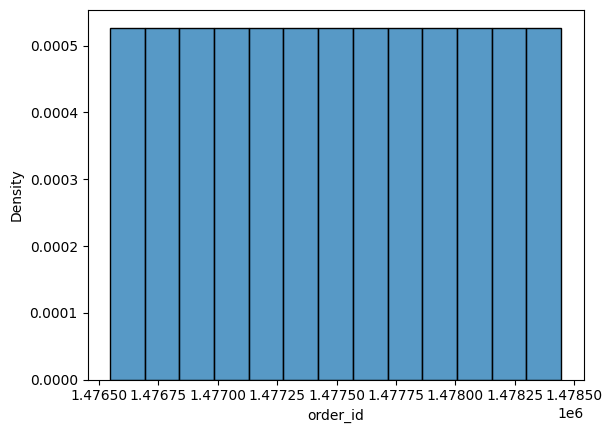

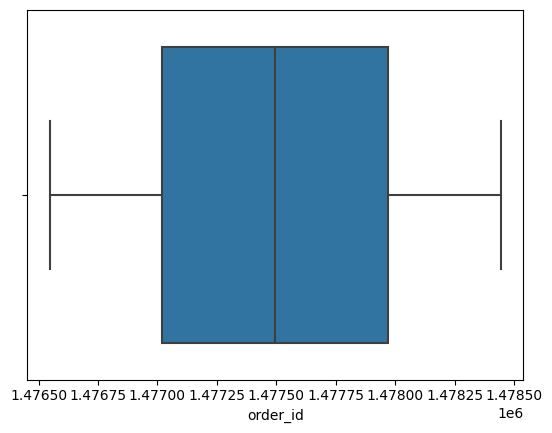

In [67]:
sns.histplot(data=Foodhub, x ='order_id', stat='density')
plt.show()
sns.boxplot(data=Foodhub, x='order_id')
plt.show()

**Observations:**
* This is a very normal distribution as all the values are closely related as seen in both the histogram chart and boxplot. It is neither right nor left skewed.
* There are no outliers at all as seen in the boxplot. 

**<center>Observations on Customer_ID column<center>**

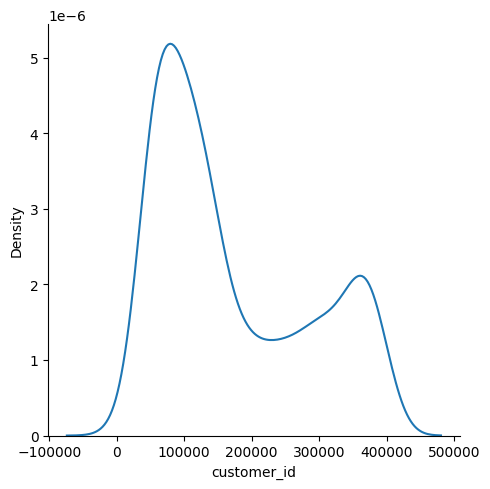

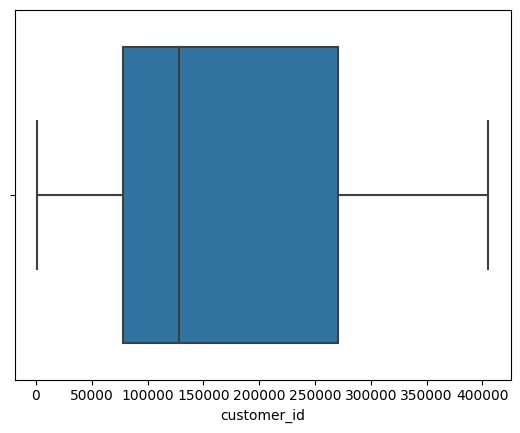

In [68]:
sns.displot(data=Foodhub,x='customer_id', kind= 'kde')
plt.show()
sns.boxplot(data=Foodhub,x='customer_id')
plt.show()

**Observations:**
* This indicates a positive correlation as the graph is skewed to the right.


**<center>Observations on the Cost of order.<center>**

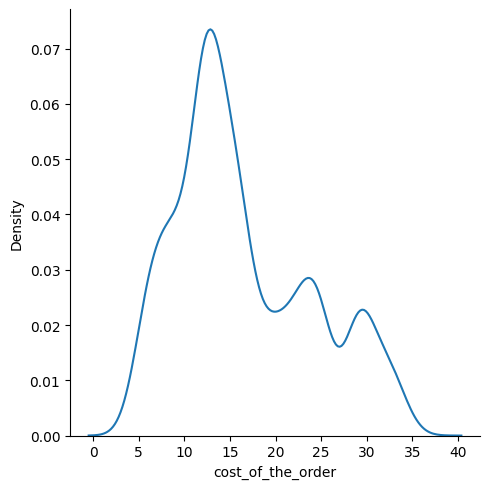

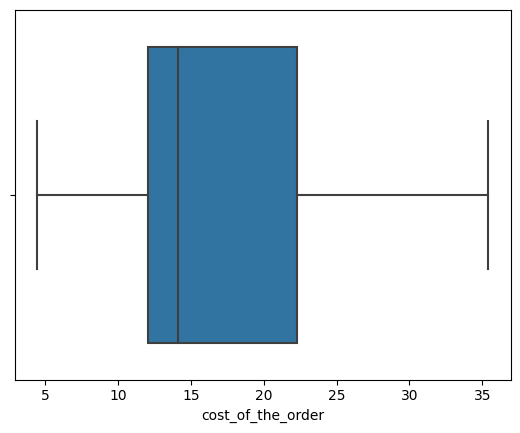

In [69]:
sns.displot(data=Foodhub,x='cost_of_the_order', kind= 'kde')
plt.show()
sns.boxplot(data=Foodhub,x='cost_of_the_order')
plt.show()

**Observations**
* This also shows a positive correlation as it is also skewed to the right.

**<center> Observations on rating.<center>**

In [ ]:

sns.displot(data=Foodhub,x='rating')
plt.show()
sns.boxplot(data=Foodhub,x='rating')
plt.show()

**Observations**
* This is negatively skewed to the left.
* This is a very good rating, as more people gave a 5 out of 5 rating.

**<center> Observations on Food preparation time.<center>**

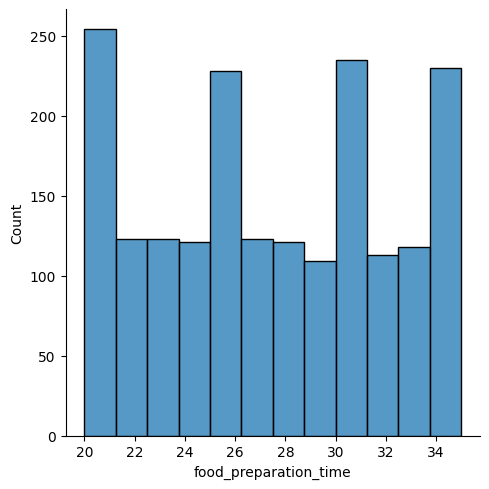

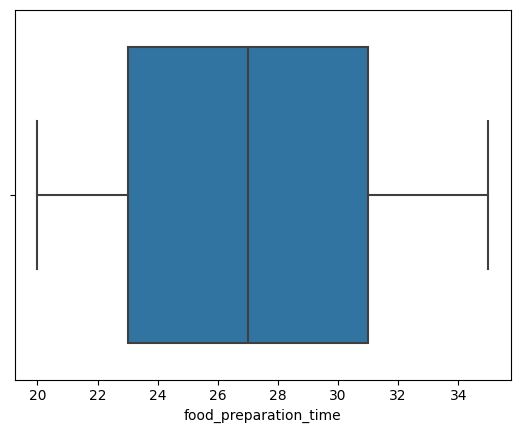

In [ ]:
sns.displot(data=Foodhub,x='food_preparation_time')
plt.show()
sns.boxplot(data=Foodhub,x='food_preparation_time')
plt.show()

**Observations**
* This is a normal distribution
* It takes an average of 27 minutes to prepare a meal.

**<center> Observations on delivery time.<center>**

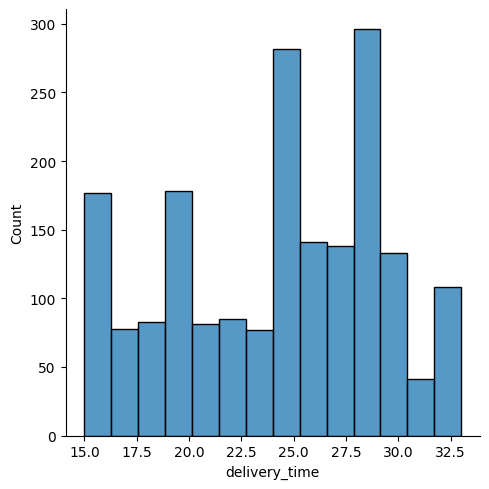

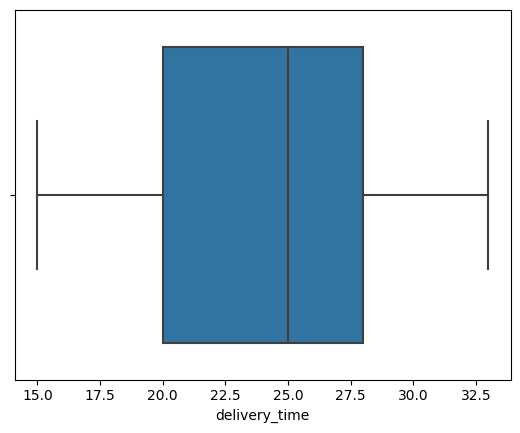

In [ ]:
sns.displot(data=Foodhub,x='delivery_time')
plt.show()
sns.boxplot(data=Foodhub,x='delivery_time')
plt.show()

**Observations**
* This plot shows negative skewness
* I think about 33 minutes is a very long time to deliver a meal that took an average of 27 minutes to cook. Well, it's dependent on the location and proximity.

In [12]:
#The top 5 restaurants in terms of number of orders received.
Foodhub['restaurant_name'].value_counts()[:5]

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

**Observations:**

* Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm are the top 5 shops in terms of number of orders received respectively.

In [ ]:
#Most popular cuisine on weekends
df = Foodhub
df_weekend = df[df['day_of_the_week']=='Weekend']


**Observations**

From the boxplot above, 75 percent of orders cost more than 20 dollars.

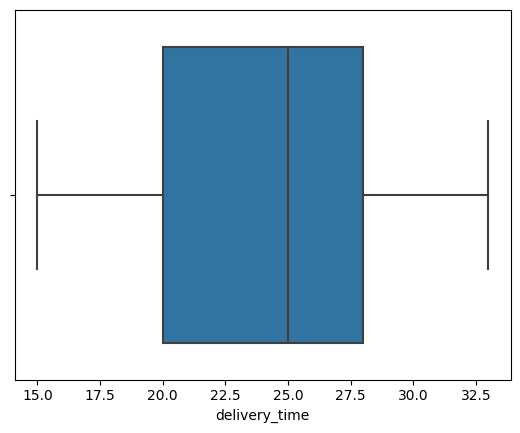

,count,mean,std,min,25%,50%,75%,max
order_id,1898.000,1477495.500,548.050,1476547.000,1477021.250,1477495.500,1477969.750,1478444.000
customer_id,1898.000,171168.478,113698.140,1311.000,77787.750,128600.000,270525.000,405334.000
cost_of_the_order,1898.000,16.499,7.484,4.470,12.080,14.140,22.297,35.410
food_preparation_time,1898.000,27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,1898.000,24.162,4.973,15.000,20.000,25.000,28.000,33.000


In [ ]:
# The Mean delivery time
sns.boxplot(data=Foodhub, x='delivery_time')
plt.show()

Foodhub.describe().T

**Observations:**

From the boxplot and summary statistics above, the mean delivery time is approximately 25 minutes.

In [13]:
#Q10
Foodhub['delivery_time'].mean()

24.161749209694417

In [ ]:
#Top 3 most frequent customers IDs
Foodhub['customer_id'].value_counts()

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: count, Length: 1200, dtype: int64

**Observations**

The IDs of the top 3 most frequent customers are 52832, 47440 and 83287 with orders 13, 10 and 9 respectively.

**Multivariate Analysis**

In [ ]:
#Foodhub.iloc[:,2:].corr()

In [81]:
Foodhub.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,unknown,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,unknown,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5.000,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3.000,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4.000,25,24


In [85]:
Foodhub['day_of_the_week'].nunique()

2

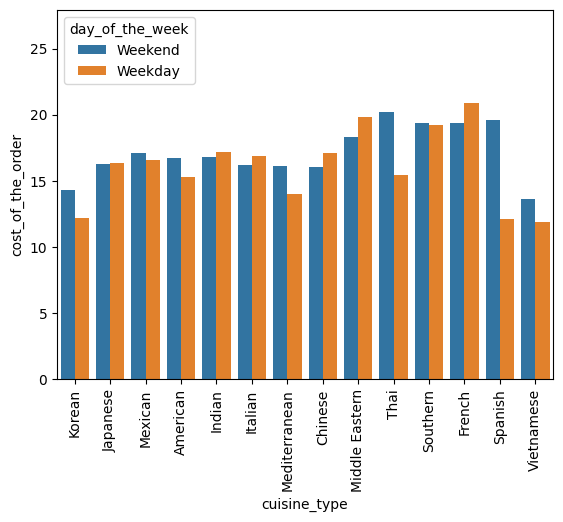

In [91]:
g= sns.barplot(data=Foodhub, x='cuisine_type', y='cost_of_the_order', hue='day_of_the_week', errwidth=0)
plt.xticks(rotation=90);

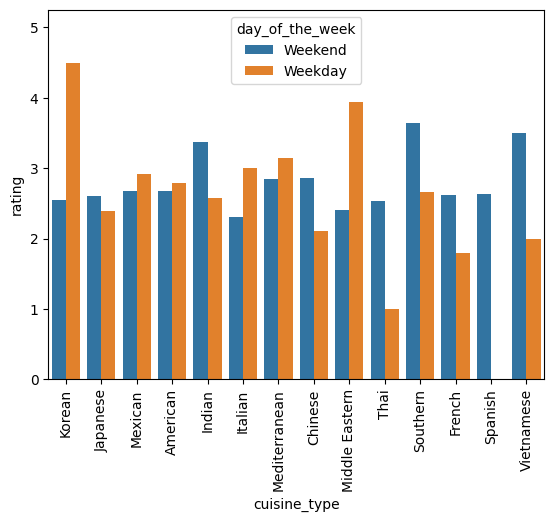

In [17]:
g= sns.barplot(data=Foodhub, x='cuisine_type', y='rating', hue='day_of_the_week', errwidth=0)
plt.xticks(rotation=90);

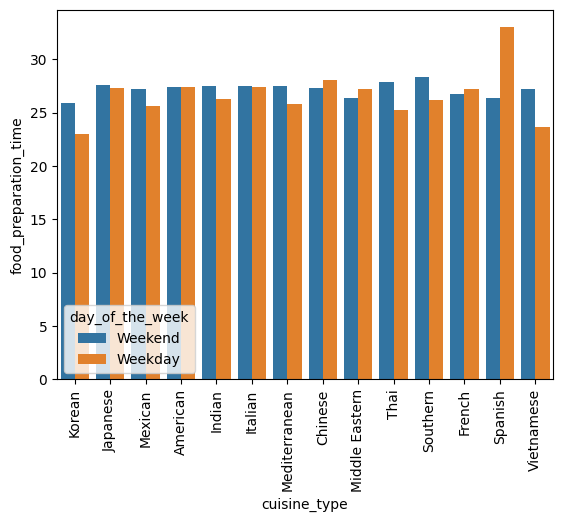

In [18]:
g= sns.barplot(data=Foodhub, x='cuisine_type', y='food_preparation_time', hue='day_of_the_week', errwidth=0)
plt.xticks(rotation=90);

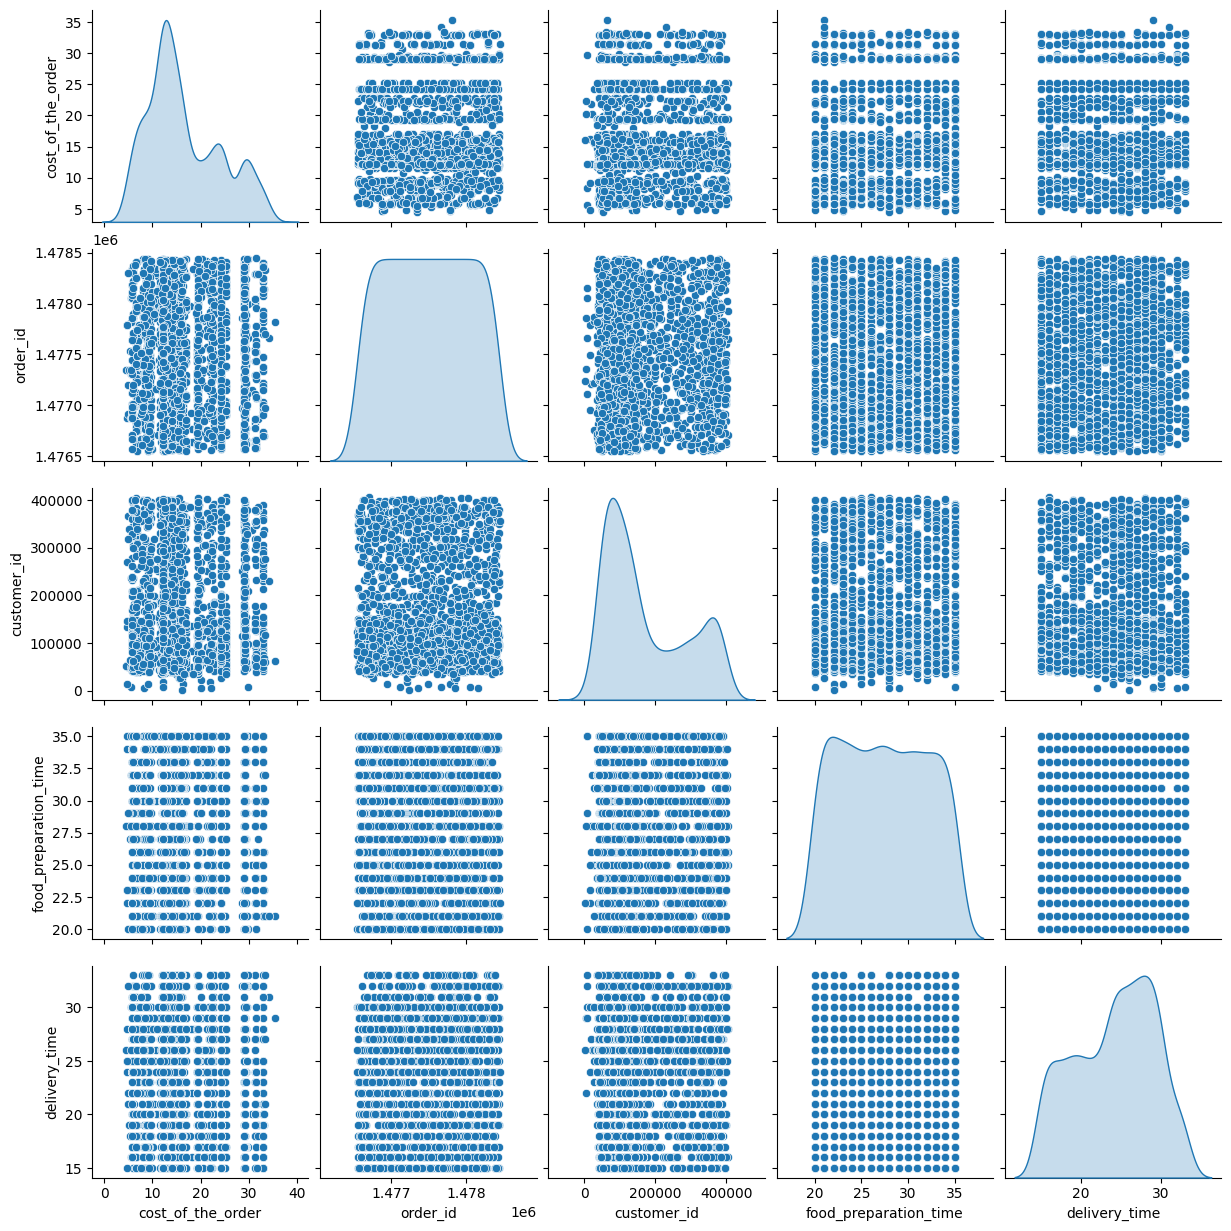

In [71]:
sns.pairplot (data=Foodhub[Num_var], diag_kind='kde')
plt.show()

In [ ]:
sns.histplot(data=Foodhub, x='rating')
plt.show()

In [ ]:
Foodhub.groupby('cost_of_the_order').rating.value_counts()

In [ ]:
# lets check the correlation between Cost of the order and rating
Foodhub[['cost_of_the_order','rating']].corr()

In [ ]:
sns.scatterplot(Foodhub,x='day_of_the_week',y='customer_id')
plt.show()

In [ ]:
sns.lineplot(data=Foodhub, x='cost_of_the_order', y='rating', errorbar=('ci',False), color='red', estimator='sum')
plt.show()

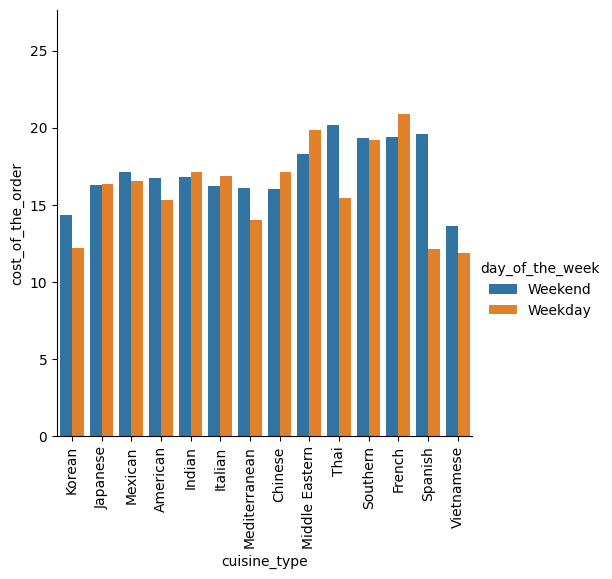

In [9]:
sns.catplot(x='cuisine_type', y='cost_of_the_order', data=Foodhub, kind='bar', hue='day_of_the_week', errwidth=0)
plt.xticks(rotation=90)
plt.show()

In [19]:
! jupyter nbconvert --to html Foodhub.ipynb

[NbConvertApp] Converting notebook Foodhub.ipynb to html
[NbConvertApp] Writing 1877287 bytes to Foodhub.html
